In [1]:
from tiny_imagenet import TinyImagenetDataProvider
from matplotlib import pyplot as plt
import torch
from PIL import Image
import numpy as np
import torchvision
from torchvision import transforms
import os

In [2]:
#dovrebbe creare il dataset la prima volta
provider=TinyImagenetDataProvider(
    save_path="C:\\Users\\simon\\Desktop\\tiny-imagenet",
    train_batch_size=64,
    test_batch_size=64,
    valid_size=None,
    n_worker=1,
    resize_scale=0.85,
    distort_color=None,
    image_size=64,
    num_replicas=None,
    rank=None,
)

dataset folder already exists
Color jitter: None, resize_scale: 0.85, img_size: 64


In [3]:
#print values for attributes
print(provider.__dict__)

{'_save_path': 'C:\\Users\\simon\\Desktop\\tiny-imagenet\\tiny-imagenet-200', 'image_size': 64, 'distort_color': 'None', 'resize_scale': 0.85, '_valid_transform_dict': {}, 'active_img_size': 64, 'train': <torch.utils.data.dataloader.DataLoader object at 0x00000222FEDCCF70>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x0000022286E8BBB0>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x0000022286E8BBB0>}


In [4]:
print(len(provider.train.dataset)) #100 000
print(len(provider.valid.dataset)) #10 000
print(len(provider.test.dataset)) #10 000
#validation and test are same object, ok
print(len(provider.train)) #100 000/64
print(len(provider.valid)) #10 000/64
print(len(provider.test)) #10 000/64

100000
10000
10000
1563
157
157


In [5]:
print(provider.build_train_transform())

Color jitter: None, resize_scale: 0.85, img_size: 64
Compose(
    RandomResizedCrop(size=(64, 64), scale=(0.85, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.4802, 0.4481, 0.3975], std=[0.277, 0.2691, 0.2821])
)


In [6]:
print(provider.build_valid_transform(64))

Compose(
    Resize(size=64, interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=[0.4802, 0.4481, 0.3975], std=[0.277, 0.2691, 0.2821])
)


In [7]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

TRAINING



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([37, 67])


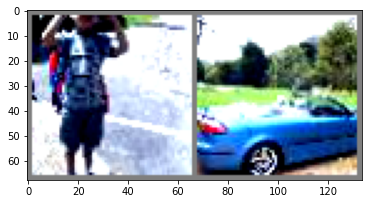

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 52, 140])


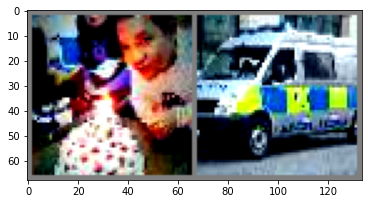

TESTING



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([136,  52])


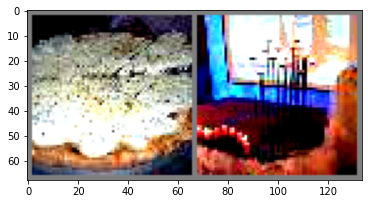

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([24, 12])


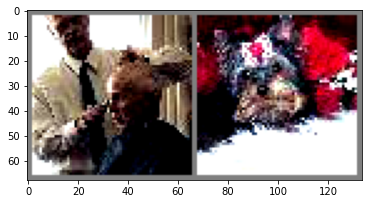

In [8]:
print("TRAINING\n")
dataiter = iter(provider.train)
for i in range(2):
    # get some random training images
    images, labels = dataiter.next()
    # show images
    print(labels[:2])
    imshow(torchvision.utils.make_grid(images[:2]))

print("TESTING\n")
dataiter = iter(provider.test)
for i in range(2):
    # get some random test images
    images, labels = dataiter.next()
    # show images
    print(labels[:2])
    imshow(torchvision.utils.make_grid(images[:2]))

In [9]:
print(provider.build_sub_train_loader(1,2))

[(tensor([[[[ 0.3617,  0.6165,  0.2626,  ...,  1.1545,  1.0837,  0.9705],
          [ 0.6165,  0.1210, -0.3745,  ...,  1.1828,  1.1120,  1.0554],
          [ 0.4608, -0.2612, -0.3745,  ...,  1.1970,  1.1687,  1.1828],
          ...,
          [ 0.4466,  0.3759,  0.3192,  ..., -0.7709, -0.5727, -0.2329],
          [ 0.5033,  0.4183,  0.3617,  ..., -1.0682, -0.4169, -0.3886],
          [ 0.5316,  0.4042,  0.3475,  ..., -0.2612, -1.3796, -0.7284]],

         [[ 0.4187,  0.8851,  0.6956,  ...,  1.4388,  1.4680,  1.4243],
          [ 0.6956,  0.4042,  0.0981,  ...,  1.3806,  1.3368,  1.2640],
          [ 0.5062,  0.0398,  0.1710,  ...,  1.2931,  1.1765,  1.1037],
          ...,
          [ 0.6956,  0.5353,  0.4042,  ..., -0.9220, -0.6014, -0.1205],
          [ 0.5936,  0.3750,  0.2293,  ..., -1.4174, -0.5868, -0.4411],
          [ 0.5062,  0.2584,  0.0690,  ..., -0.6596, -1.5923, -0.8782]],

         [[ 0.4954,  0.7039,  0.4537,  ...,  1.8438,  1.8438,  1.8021],
          [ 0.7178,  0.2313,

In [10]:
print(provider.__dict__)

{'_save_path': 'C:\\Users\\simon\\Desktop\\tiny-imagenet\\tiny-imagenet-200', 'image_size': 64, 'distort_color': 'None', 'resize_scale': 0.85, '_valid_transform_dict': {}, 'active_img_size': 64, 'train': <torch.utils.data.dataloader.DataLoader object at 0x00000222FEDCCF70>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x0000022286E8BBB0>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x0000022286E8BBB0>, 'sub_train_64': [(tensor([[[[ 0.3617,  0.6165,  0.2626,  ...,  1.1545,  1.0837,  0.9705],
          [ 0.6165,  0.1210, -0.3745,  ...,  1.1828,  1.1120,  1.0554],
          [ 0.4608, -0.2612, -0.3745,  ...,  1.1970,  1.1687,  1.1828],
          ...,
          [ 0.4466,  0.3759,  0.3192,  ..., -0.7709, -0.5727, -0.2329],
          [ 0.5033,  0.4183,  0.3617,  ..., -1.0682, -0.4169, -0.3886],
          [ 0.5316,  0.4042,  0.3475,  ..., -0.2612, -1.3796, -0.7284]],

         [[ 0.4187,  0.8851,  0.6956,  ...,  1.4388,  1.4680,  1.4243],
          [ 0.6956,  0.4042